In [1]:
with open('docs.txt', 'r') as file:
    text = file.read()

# Split the text into sentences based on common punctuation marks
sentences = text.replace('\n', ' ').split('. ') 

sentences

['the king and the queen ruled the quiet castle by the river',
 'a man and a woman walked to the market near the castle at dawn',
 'the prince rode a horse across the grassy field beside the river',
 'villagers sold warm bread and sweet apples in the busy market',
 'at night the queen and the prince listened to music while the king spoke with a wise man.']

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mouha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mouha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load stopwords from nltk
stop_words = set(stopwords.words('english'))

# Preprocessing function using NLTK
def preprocess(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove stopwords and punctuation
    cleaned_words = [word for word in words if word not in stop_words and word not in string.punctuation]
    
    # Join words back into a cleaned sentence
    cleaned_text = " ".join(cleaned_words)
    
    return cleaned_text

# Assuming 'sentences' is the list variable with the sentences
def preprocess_sentences(sentences):
    # Apply preprocessing to each sentence in the list
    processed_sentences = [preprocess(sentence) for sentence in sentences]
    
    return processed_sentences

result = preprocess_sentences(sentences)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [5]:
# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit the model and transform the sentences into a BoW matrix
X = vectorizer.fit_transform(result)

# Convert the matrix to a pandas DataFrame for easier viewing
bow_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the BoW matrix
print(bow_matrix)

   across  apples  beside  bread  busy  castle  dawn  field  grassy  horse  \
0       0       0       0      0     0       1     0      0       0      0   
1       0       0       0      0     0       1     1      0       0      0   
2       1       0       1      0     0       0     0      1       1      1   
3       0       1       0      1     1       0     0      0       0      0   
4       0       0       0      0     0       0     0      0       0      0   

   ...  rode  ruled  sold  spoke  sweet  villagers  walked  warm  wise  woman  
0  ...     0      1     0      0      0          0       0     0     0      0  
1  ...     0      0     0      0      0          0       1     0     0      1  
2  ...     1      0     0      0      0          0       0     0     0      0  
3  ...     0      0     1      0      1          1       0     1     0      0  
4  ...     0      0     0      1      0          0       0     0     1      0  

[5 rows x 31 columns]


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a TfidfVectorizer instance
vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed sentences to get the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(result)

# Convert the TF-IDF matrix to a DataFrame for easier viewing
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the TF-IDF matrix
print(tfidf_df)

    across    apples   beside     bread      busy    castle      dawn  \
0  0.00000  0.000000  0.00000  0.000000  0.000000  0.376020  0.000000   
1  0.00000  0.000000  0.00000  0.000000  0.000000  0.330677  0.409865   
2  0.37007  0.000000  0.37007  0.000000  0.000000  0.000000  0.000000   
3  0.00000  0.361529  0.00000  0.361529  0.361529  0.000000  0.000000   
4  0.00000  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   

     field   grassy    horse  ...     rode     ruled      sold     spoke  \
0  0.00000  0.00000  0.00000  ...  0.00000  0.466067  0.000000  0.000000   
1  0.00000  0.00000  0.00000  ...  0.00000  0.000000  0.000000  0.000000   
2  0.37007  0.37007  0.37007  ...  0.37007  0.000000  0.000000  0.000000   
3  0.00000  0.00000  0.00000  ...  0.00000  0.000000  0.361529  0.000000   
4  0.00000  0.00000  0.00000  ...  0.00000  0.000000  0.000000  0.362651   

      sweet  villagers    walked      warm      wise     woman  
0  0.000000   0.000000  0.000000  0.000

In [7]:
# Extract the vocabulary
vocabulary = vectorizer.get_feature_names_out()

# Display the vocabulary
print("Vocabulary extracted from the corpus:")
print(vocabulary)

Vocabulary extracted from the corpus:
['across' 'apples' 'beside' 'bread' 'busy' 'castle' 'dawn' 'field'
 'grassy' 'horse' 'king' 'listened' 'man' 'market' 'music' 'near' 'night'
 'prince' 'queen' 'quiet' 'river' 'rode' 'ruled' 'sold' 'spoke' 'sweet'
 'villagers' 'walked' 'warm' 'wise' 'woman']


In [13]:
! pip install spacy
! python -m spacy download en_core_web_md


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     - -------------------------------------- 1.0/33.5 MB 7.2 MB/s eta 0:00:05
     --- ------------------------------------ 2.6/33.5 MB 7.6 MB/s eta 0:00:05
     ----- ---------------------------------- 5.0/33.5 MB 8.9 MB/s eta 0:00:04
     --------- ------------------------------ 8.1/33.5 MB 10.3 MB/s eta 0:00:03
     ---------- ----------------------------- 8.7/33.5 MB 10.3 MB/s eta 0:00:03
     ---------- ----------------------------- 9.2/33.5 MB 7.8 MB/s eta 0:00:04
     ----------- ---------------------------- 9.7/33.5 MB 7.2 MB/s eta 0:00:04
     ------------ --------------------------- 10.7/33.5 MB 6.5 MB/s eta 0:00:04
     -------------- ------------------------- 12.3/33.5 MB 6.8 MB/s eta 0:00:04
     --------------- ------------------------ 13.1/33.5 MB 6.3 MB/s eta 0:00:04
     ----------------- ---------------------- 14.4/33.5


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


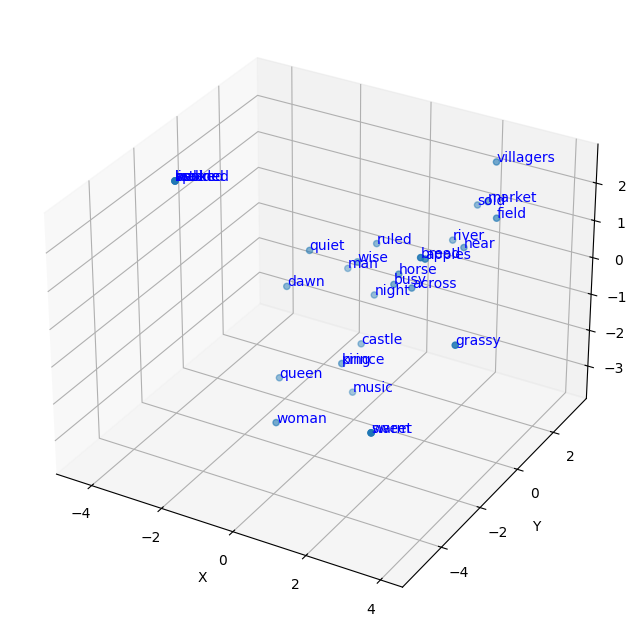

In [15]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load spaCy model with word vectors
nlp = spacy.load('en_core_web_md')



# Prepare the list of words for the vocabulary
words = []
for sentence in result:
    doc = nlp(sentence)
    for token in doc:
        words.append(token.text)

# Get the unique words (vocabulary)
vocabulary = list(set(words))

# Create word embeddings using spaCy
word_vectors = np.array([nlp(word).vector for word in vocabulary])

# Apply PCA to reduce the dimensionality to 3D
pca = PCA(n_components=3)
result = pca.fit_transform(word_vectors)

# Plotting the words in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the words in 3D space
ax.scatter(result[:, 0], result[:, 1], result[:, 2])

# Annotate each point with the corresponding word
for i, word in enumerate(vocabulary):
    ax.text(result[i, 0], result[i, 1], result[i, 2], word, color='blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()



In [16]:
! pip install sentence_transformers
! pip install tf-keras


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------------------- -- 1.6/1.7 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 8.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/331.7 MB ? eta -:--:--
   ---------------------------------------- 2.4/331.7 MB 11.2 MB/s eta 0:00:30
    --------------------------------------- 4.5/331.7 MB 10.8 MB/s eta 0:00:31
    --------------------------------------- 6.0/331.7 MB 9.5 MB/s eta 0:00:35
   - -------------------------------------- 8.4/331.7 MB 9.8 MB/s eta 0:00:33
   - -------------------------------------- 10.7/331.7 MB 10.2 MB/s eta 0:00:32
   - -------------------------------------- 13.6/331.7 MB 10.7 MB/s eta 0:00:30
   - -------------------------------------- 16.3/331.7 MB 10.9 MB/s eta 0:00:29
   -- ------------------------------------- 18.6/331.7 MB 11.0 MB/s eta 0:0

  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\mouha\\AppData\\Roaming\\Python\\Python310\\site-packages\\tensorflow\\compiler\\mlir\\quantization\\tensorflow\\python\\pywrap_function_lib.pyd'
Check the permissions.


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import os
os.environ["USE_TF"] = "0"   
os.environ["USE_TORCH"] = "1"  



In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA




model = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = model.encode(result)

pca = PCA(n_components=3)
result_3d = pca.fit_transform(embeddings)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(result_3d[:, 0], result_3d[:, 1], result_3d[:, 2])


for i, sentence in enumerate(result):
    ax.text(result_3d[i, 0], result_3d[i, 1], result_3d[i, 2], sentence, color='blue')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


ValueError: Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.